# Example: Cross scoring

In case you have not downloaded and imported a reference panel yet, open a terminal and execute in the PascalX/misc folder:

```bash get1KGGRCh38.sh /yourfolder/ EUR```

This command will download and plink convert 1KG project data for the european subpolulation. The data will be stored in ```/yourfolder/```. 

NOTE: The refpanel in the ```demo/``` folder is for chr 1 only and simulated !

#### Load the coherence scorer:

In [1]:
from PascalX import xscorer

Xscorer = xscorer.zsum(window=50000,varcutoff=0.99)

#### Load the reference panel into the genescorer:


In [2]:
Xscorer.load_refpanel('../demo/EUR.simulated',parallel=1)

Reference panel data not imported. Trying to import...
ERROR:  ../demo/EUR.simulated.chr2.(tped|vcf).gz not found


The first time this command is executed for a reference panel, an internal SNP database will be generated on disk. This process may take several hours. You can use the ```parallel=``` option to speed up via parallelization. Subsequent calls of this method will be very fast.

#### Load a gene annotation:

If you do not have a gene annotation yet, you can download automatically from BioMart via

In [3]:
from PascalX.genome import genome

G = genome()
G.get_ensembl_annotation('biomart_GRCh38.tsv')

done


The annotation will be saved in the file ```biomart_GRCh38.tsv```. 

You still need to load the annotation into the genescorer as follows:

In [3]:
Xscorer.load_genome('biomart_GRCh38.tsv')

18498 active genes


#### Load two GWAS:

In [6]:
Xscorer.load_GWAS("../demo/gwasA.tsv.gz",name='A',rscol=0,pcol=4,bcol=3,a1col=1,a2col=2,delimiter="\t",header=False)
Xscorer.load_GWAS("../demo/gwasB.tsv.gz",name='B',rscol=0,pcol=4,bcol=3,a1col=1,a2col=2,delimiter="\t",header=False)

A 331769 SNPs loaded ( min p: 1.7326565679188127e-62 )
B 331769 SNPs loaded ( min p: 2.6202381205003234e-76 )


You can either load a raw text file or gzip compressed with file ending .gz

#### Uniformize the two GWAS:

In [7]:
Xscorer.matchAlleles('A','B',matchRefPanel=False) # Warning: RefPanel matching needs enough memory to load the full reference panel into memory !
Xscorer.jointlyRank('A','B')

331769 common SNPs
0.0 % non-matching alleles        ->  0 SNPs removed
331769 shared SNPs ( min p: 3.01e-06 )


#### Start the scoring:

To score all genes in the loaded annotation, execute

In [8]:
R = Xscorer.score_all('A','B',parallel=1,nobar=False)

  0%|           [ estimated time left: ? ]

2010 genes scored
16488 genes can not be scored (check annotation)


The raw results will be stored in ```R```. Use the ```parallel=``` option to increase the number of cpu cores to use (make sure that you have sufficient memory). Note that for you can switch off the progress bar via setting ```nobar=True```.

The top scored genes can be listed via

In [9]:
Xscorer.get_topscores(N=10);

FCRL6   1.2305079637684855e-19
DUSP23   1.2806949178159256e-19
SLAMF8   7.784733366203966e-16
VSIG8   2.1139128555421122e-11
CFAP45   4.806706309867792e-06
ZFYVE9   0.001698037739724656
FCRL2   0.003376819094282779
ATAD3A   0.00526728226193196
CHD1L   0.005489616180671897
TMEM240   0.006101535139317882


#### Visualisation:

18498 active genes


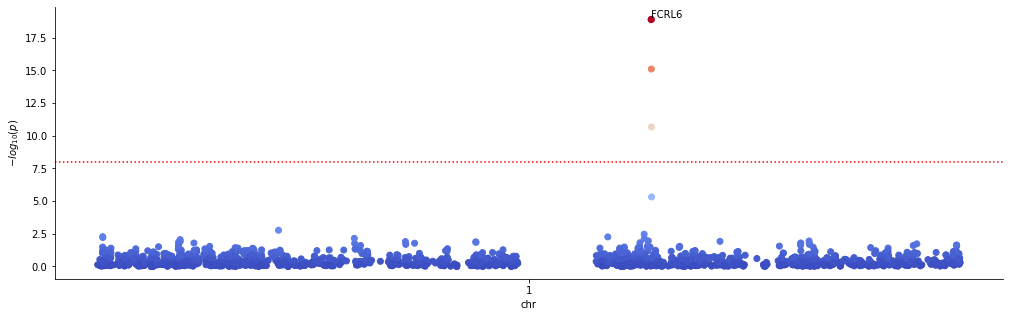

In [11]:
import matplotlib.pyplot as plt
from PascalX import genescorer
plt.figure(figsize=(17,5))

gscorer = genescorer.chi2sum()
gscorer.load_genome('biomart_GRCh38.tsv')
gscorer.plot_Manhattan(R[0],sigLine=1e-8,labelList=['FCRL6'])

Window size: 50000
Chr: 1
1.18 % MAF filtered | 100.0 % matching alleles
# SNP: 251


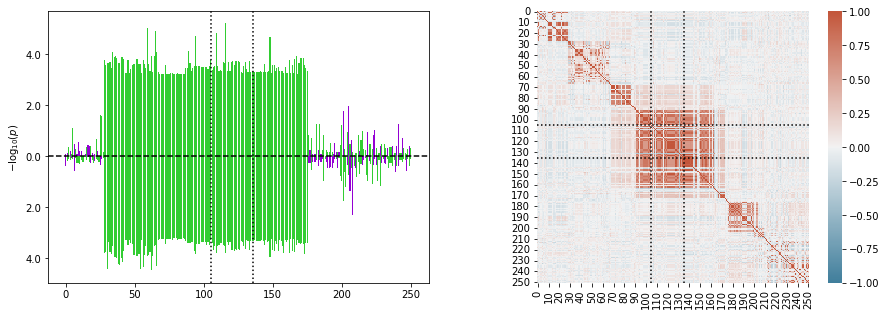

In [17]:
plt.figure(figsize=(15,5))
Xscorer.plot_genesnps('FCRL6','A','B',mark_window=True,show_correlation=True);